[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](
https://github.com/CodingPro777/AAI-530-GROUP-1/edit/main/final_project_code.ipynb
)


# USD AAI-530 Group 1 final project - Machine Learning with IoT(FitBit Fitness)

*Group 1 members: Ali Abdul-Hameed, Jack Kim, Jinyuan He*

The dataset is from Kaggle and originates from Fitbit wearable devices. The dataset contains Fitbit sensor data collected from April 12, 2016 to May 12, 2016.

Data download link: [download](https://www.kaggle.com/datasets/arashnic/fitbit)



In [2]:
# load packages
import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sns


# 1. Data cleaning & EDA

## 1.1 Loading dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# upload dataset zip file to google drive if not exist
google_drive_path = '/content/drive/MyDrive/USD/2026 Spring/AAI-530-GROUP-1'

zip_file_path = google_drive_path + '/archive.zip'

if not os.path.isfile(zip_file_path):
  from google.colab import files
  uploaded = files.upload()
  !mv archive.zip '/content/drive/MyDrive/USD/2026 Spring/AAI-530-GROUP-1'


!unzip '/content/drive/MyDrive/USD/2026 Spring/AAI-530-GROUP-1/archive.zip'

Archive:  /content/drive/MyDrive/USD/2026 Spring/AAI-530-GROUP-1/archive.zip
  inflating: mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/dailyActivity_merged.csv  
  inflating: mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/heartrate_seconds_merged.csv  
  inflating: mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/hourlyCalories_merged.csv  
  inflating: mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/hourlyIntensities_merged.csv  
  inflating: mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/hourlySteps_merged.csv  
  inflating: mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/minuteCaloriesNarrow_merged.csv  
  inflating: mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/minuteIntensitiesNarrow_merged.csv  
  inflating: mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/minuteMETsNarrow_merged.csv  
  inflating: mturkfitbit_export_3.12.16-4.11.16/Fitabase

In [4]:
# combine two months dataset into one

raw_daily_activity_df = pd.concat(
    [pd.read_csv('/content/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/dailyActivity_merged.csv'),
    pd.read_csv('/content/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv')]
)

raw_weight_df = pd.concat(
    [pd.read_csv('/content/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/weightLogInfo_merged.csv'),
    pd.read_csv('/content/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv')]
)

raw_hr_sec_df = pd.concat(
    [pd.read_csv('/content/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/heartrate_seconds_merged.csv'),
    pd.read_csv('/content/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/heartrate_seconds_merged.csv')]
)

raw_calories_min_df = pd.concat(
    [pd.read_csv('/content/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/minuteCaloriesNarrow_merged.csv'),
    pd.read_csv('/content/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/minuteCaloriesNarrow_merged.csv')]
)

raw_intensities_min_df = pd.concat(
    [pd.read_csv('/content/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/minuteIntensitiesNarrow_merged.csv'),
    pd.read_csv('/content/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/minuteIntensitiesNarrow_merged.csv')]
)

raw_mets_min_df = pd.concat(
    [pd.read_csv('/content/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/minuteMETsNarrow_merged.csv'),
    pd.read_csv('/content/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/minuteMETsNarrow_merged.csv')]
)

raw_sleep_min_df = pd.concat(
    [pd.read_csv('/content/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/minuteSleep_merged.csv'),
    pd.read_csv('/content/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/minuteSleep_merged.csv')]
)


raw_step_min_df = pd.concat(
    [pd.read_csv('/content/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/minuteStepsNarrow_merged.csv'),
    pd.read_csv('/content/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/minuteStepsNarrow_merged.csv')]
)

## 1.2 Dataset for calories prediction

In [5]:
# merge data files of intentity, METs and step
calories_df = raw_calories_min_df.merge(
    raw_intensities_min_df,
    on=['Id', 'ActivityMinute'],
    how='left'
)

calories_df = calories_df.merge(
    raw_mets_min_df,
    on=['Id', 'ActivityMinute'],
    how='left'
)

calories_df = calories_df.merge(
    raw_step_min_df,
    on=['Id', 'ActivityMinute'],
    how='left'
)

calories_df['ActivityMinute'] = pd.to_datetime(
    calories_df['ActivityMinute'],
    format='%m/%d/%Y %I:%M:%S %p'
)


In [6]:
calories_df.isna().sum()

,0
Id,0
ActivityMinute,0
Calories,0
Intensity,0
METs,0
Steps,0


In [7]:
number_cols = [
    'Calories',
    'Intensity',
    'METs',
    'Steps'
]

calories_df[number_cols] = calories_df[number_cols].apply(pd.to_numeric)

In [8]:
pd.options.display.float_format = '{:.0f}'.format
calories_df.describe()

,Id,ActivityMinute,Calories,Intensity,METs,Steps
count,2917620,2917620,2917620,2917620,2917620,2917620
mean,4866573178,2016-04-10 19:20:27.486581760,2,0,14,5
min,1503960366,2016-03-12 00:00:00,0,0,0,0
25%,2320127002,2016-03-27 08:23:00,1,0,10,0
50%,4558609924,2016-04-12 01:12:00,1,0,10,0
75%,6962181067,2016-04-24 19:45:00,1,0,11,0
max,8877689391,2016-05-12 15:59:00,23,3,189,220
std,2433466479,NaN,1,1,12,18


### 1.2.1 Check minute-level time continuity in the dataset

In [9]:
# Sort by value
calories_df = calories_df.sort_values(['Id', 'ActivityMinute'], ascending=True)

# Remove duplicated data
calories_df = calories_df.drop_duplicates(subset=['Id', 'ActivityMinute'])

# Check minute-level time continuity in the dataset
calories_df.groupby('Id')['ActivityMinute'].diff().value_counts().head(30)

,count
ActivityMinute,
0 days 00:01:00,2760074
0 days 04:01:00,2
1 days 20:01:00,1
1 days 09:01:00,1
3 days 01:01:00,1
0 days 02:01:00,1
0 days 14:01:00,1
2 days 01:01:00,1
9 days 07:01:00,1


#### PS: The minute-level activity data is largely continuous, with over 99% of consecutive records occurring at 1-minute intervals. A small number of duplicate timestamps and occasional multi-hour gaps were observed, likely due to device synchronization or user inactivity.

In [10]:
# We mark time gaps in the data so that the records can be separated into sessions or removed when training time-series models.
calories_df['minute_gap'] = (
    calories_df.groupby('Id')['ActivityMinute']
      .diff()
      .dt.total_seconds()
      .div(60)
)

calories_df['has_gap'] = (calories_df['minute_gap'] > 1).astype(int)

In [11]:
# Split into contiguous segments (per user)
calories_df['time_diff'] = (
    calories_df.groupby('Id')['ActivityMinute']
      .diff()
      .dt.total_seconds()
)

EXPECTED_INTERVAL = 60   # second
THRESHOLD = 60 * 2  # 2 mins

calories_df['new_segment'] = (
    (calories_df['time_diff'] > THRESHOLD) |
    calories_df['time_diff'].isna()
)

calories_df['segment_id'] = (
    calories_df.groupby('Id')['new_segment']
      .cumsum()
)

calories_df['segment_uid'] = (
    calories_df['Id'].astype(str) + '_' +
    calories_df['segment_id'].astype(str)
)

# Filter long segments
segment_stats = (
    calories_df.groupby(['Id', 'segment_uid'])
      .agg(
          start_time=('ActivityMinute', 'min'),
          end_time=('ActivityMinute', 'max'),
          n_points=('ActivityMinute', 'count')
      )
      .reset_index()
)

segment_stats['duration_sec'] = (
    segment_stats['end_time'] - segment_stats['start_time']
).dt.total_seconds()

valid_segments = segment_stats[
    segment_stats['duration_sec'] >= THRESHOLD
]

calories_merged_df = calories_df.merge(
    valid_segments[['segment_uid']],
    on='segment_uid',
    how='inner'
)

### 1.2.2 EDA

In [12]:
print(f"""
Number of users: {calories_merged_df['Id'].nunique()}
Number of segments: {calories_merged_df['segment_uid'].nunique()}
Number of points: {calories_merged_df['ActivityMinute'].count()}

Longest segment: {calories_merged_df['segment_uid'].value_counts().max() / 60} hours
Shortest segment: {calories_merged_df['segment_uid'].value_counts().min() / 60} hours
Average segment: {calories_merged_df['segment_uid'].value_counts().mean() / 60} hours
""")


Number of users: 35
Number of segments: 46
Number of points: 2760120

Longest segment: 1480.0 hours
Shortest segment: 12.0 hours
Average segment: 1000.0434782608696 hours



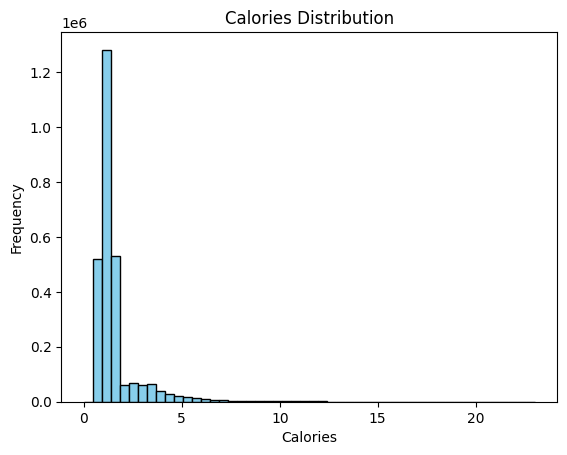

In [13]:

plt.hist(calories_merged_df['Calories'], bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Calories')
plt.ylabel('Frequency')
plt.title('Calories Distribution')
plt.show()

array([[<Axes: title={'center': 'Steps'}>,
        <Axes: title={'center': 'METs'}>],
       [<Axes: title={'center': 'Intensity'}>, <Axes: >]], dtype=object)

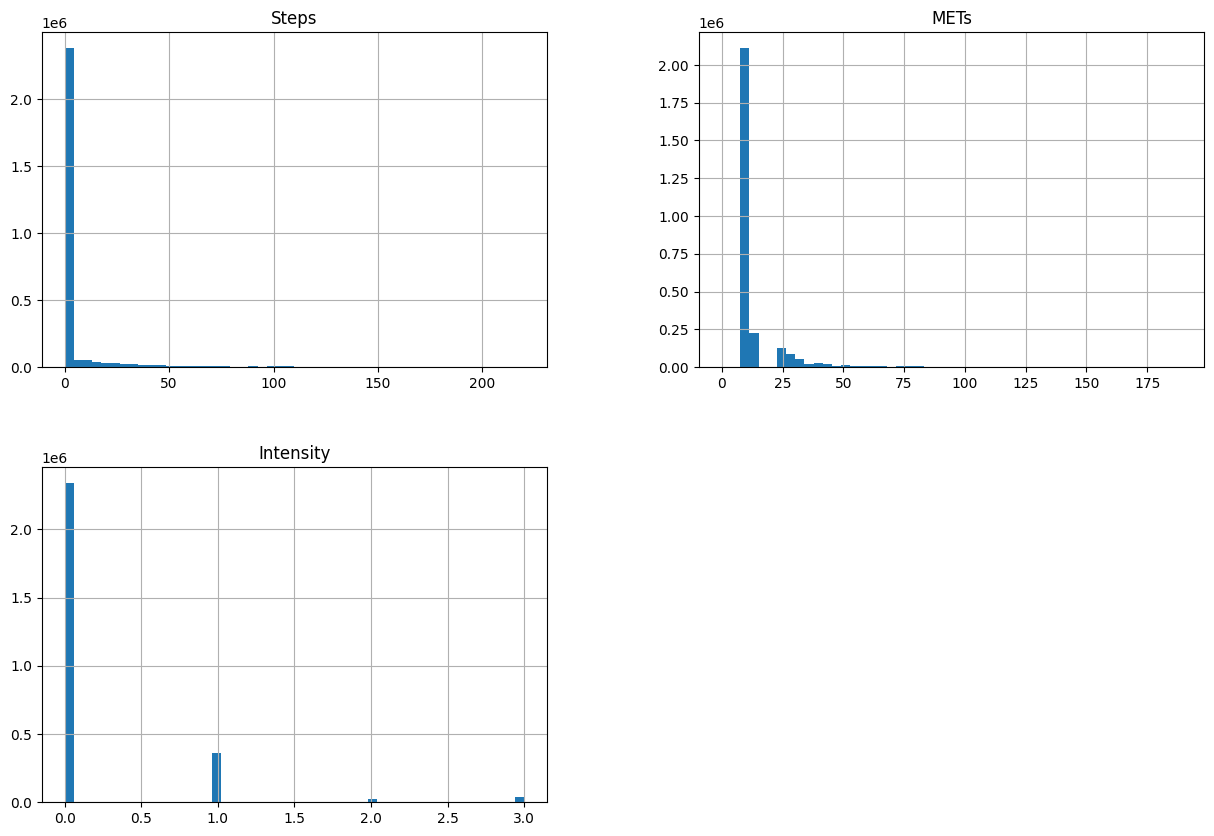

In [14]:
calories_merged_df[['Steps', 'METs', 'Intensity']].hist(bins=50, figsize=(15,10))

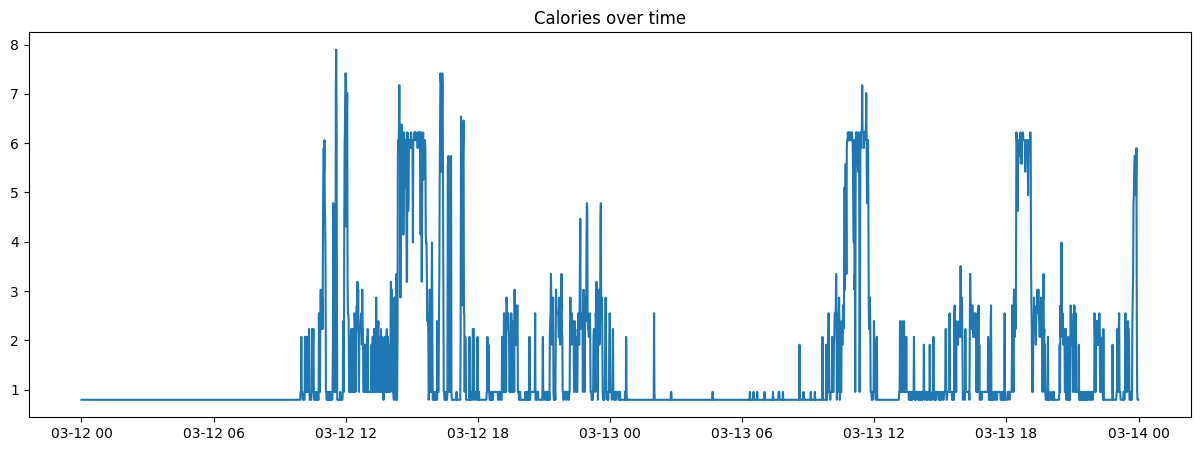

In [15]:
uid = calories_merged_df['Id'].iloc[0]

sample = (
    calories_merged_df[calories_merged_df['Id'] == uid]
        .head(2 * 24 * 60)
)
plt.figure(figsize=(15, 5))
plt.plot(sample['ActivityMinute'], sample['Calories'], label='Calories')
plt.title('Calories over time')
plt.show()

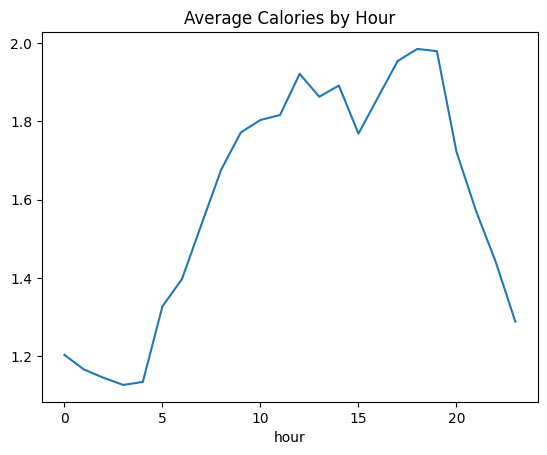

In [16]:
calories_merged_df['hour'] = calories_merged_df['ActivityMinute'].dt.hour

calories_merged_df.groupby('hour')['Calories'].mean().plot(kind='line')
plt.title('Average Calories by Hour')
plt.show()

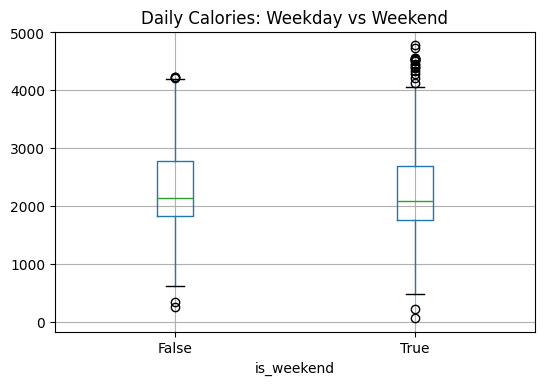

In [17]:
df = calories_merged_df.copy()

df["dayofweek"] = df["ActivityMinute"].dt.dayofweek
# Monday=0, Sunday=6
df["is_weekend"] = df["dayofweek"].isin([5, 6])

daily = (
    df.groupby(["Id", "is_weekend", df["ActivityMinute"].dt.date])["Calories"]
      .sum()
      .reset_index()
)

daily.boxplot(column="Calories", by="is_weekend", figsize=(6,4))
plt.title("Daily Calories: Weekday vs Weekend")
plt.suptitle("")
plt.show()

In [18]:
calories_merged_df[calories_merged_df['segment_id'] > 1]

,Id,ActivityMinute,Calories,Intensity,METs,Steps,minute_gap,has_gap,time_diff,new_segment,segment_id,segment_uid,hour
218460,1644430081,2016-04-12 00:00:00,1,0,10,0,2641,1,158460,True,2,1644430081_2,0
218461,1644430081,2016-04-12 00:01:00,1,0,10,0,1,0,60,False,2,1644430081_2,0
218462,1644430081,2016-04-12 00:02:00,1,0,10,0,1,0,60,False,2,1644430081_2,0
218463,1644430081,2016-04-12 00:03:00,1,0,10,0,1,0,60,False,2,1644430081_2,0
218464,1644430081,2016-04-12 00:04:00,1,0,10,0,1,0,60,False,2,1644430081_2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2586475,8583815059,2016-05-11 21:55:00,1,0,10,0,1,0,60,False,2,8583815059_2,21
2586476,8583815059,2016-05-11 21:56:00,1,0,10,0,1,0,60,False,2,8583815059_2,21
2586477,8583815059,2016-05-11 21:57:00,1,0,10,0,1,0,60,False,2,8583815059_2,21
2586478,8583815059,2016-05-11 21:58:00,2,0,11,0,1,0,60,False,2,8583815059_2,21


#### Interpretation

**1. Calories Distribution**
From the calories distribution, we observe that most calories burned per minute fall within the range of approximately 0 to 1.5, forming a right-skewed distribution. This indicates that while most minutes involve low energy expenditure, users occasionally reach much higher calorie burn levels, likely during periods of exercise. Similarly, Steps, METs, and Intensity exhibit comparable right-skewed patterns, reflecting sporadic bursts of higher activity.

**2. Hourly Activity Pattern**
The hourly average plot shows that calorie expenditure is lowest during nighttime hours and higher during daytime, corresponding to typical human activity and rest cycles. This pattern is consistent with expected daily routines and supports the validity of the data.

**3. Weekday vs. Weekend Comparison**
The boxplot comparison shows that daily calories burned on weekends are slightly higher than on weekdays. The medians and interquartile ranges are comparable for both groups, and no obvious abnormal patterns are observed, indicating a generally consistent distribution of calorie expenditure across weekdays and weekends.



### 1.2.3 Features Correlation

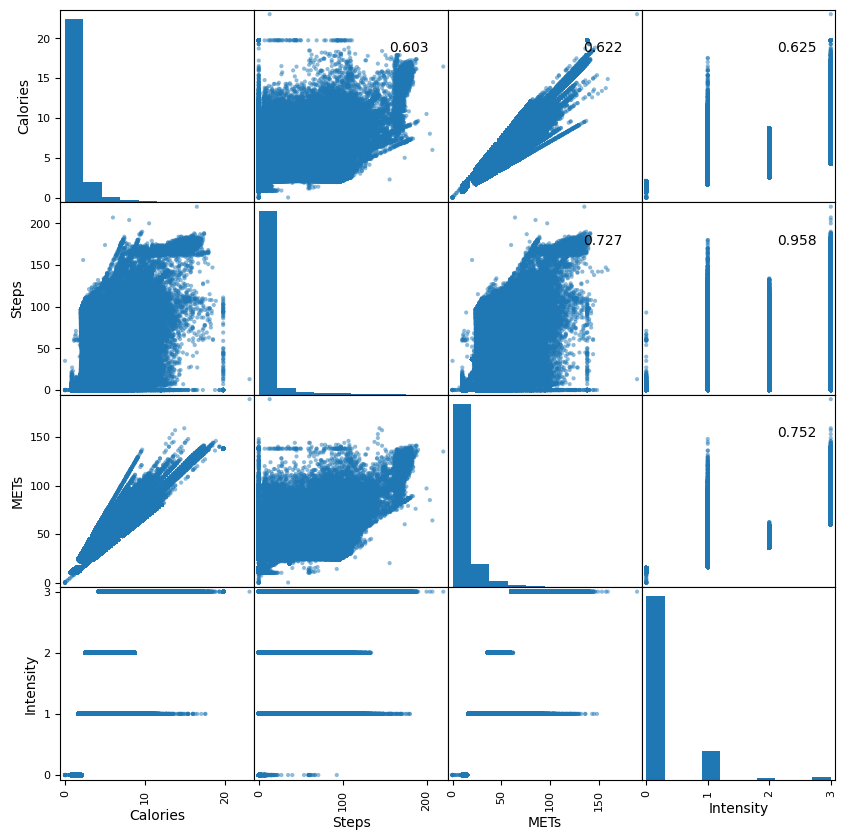

In [19]:
axes = pd.plotting.scatter_matrix(calories_merged_df[['Calories','Steps','METs','Intensity']], alpha=0.5,figsize= [10,10])
corr = calories_merged_df[['Calories','Steps','METs','Intensity']].corr(method = 'spearman').to_numpy()
#nonlinear
for i, j in zip(*plt.np.triu_indices_from(axes, k=1)):
  axes[i, j].annotate("%.3f" %corr[i,j], (0.8, 0.8), xycoords='axes fraction', ha='center', va='center')

plt.show()

## 1.3 Dataset for sleep status prediction



*   Merge sleep status with heart rate(min, max, avg)/Intensity/METs
*   Split into contiguous segments (per user)
*   Filter long segments




In [20]:
# ensure datetime
raw_hr_sec_df['Time'] = pd.to_datetime(raw_hr_sec_df['Time'])

# drill up to minute
raw_hr_sec_df['ActivityMinute'] = raw_hr_sec_df['Time'].dt.floor('min')

# aggregate
hr_min_df = (
    raw_hr_sec_df.groupby(['Id', 'ActivityMinute'])['Value']
      .agg(
          min_hr='min',
          max_hr='max',
          avg_hr='mean'
      )
      .reset_index()
)

In [262]:
# Merge sleep status with heart rate(min, max, avg)/Intensity/METs
raw_intensities_min_df['ActivityMinute'] = pd.to_datetime(
    raw_intensities_min_df['ActivityMinute'],
    format='%Y%m%d %H:%M:%S'
)

raw_mets_min_df['ActivityMinute'] = pd.to_datetime(
    raw_mets_min_df['ActivityMinute'],
    format='%Y%m%d %H:%M:%S'
)

raw_step_min_df['ActivityMinute'] = pd.to_datetime(
    raw_step_min_df['ActivityMinute'],
    format='%Y%m%d %H:%M:%S'
)

raw_sleep_min_df['date'] = pd.to_datetime(
    raw_sleep_min_df['date'],
    format='%Y%m%d %H:%M:%S'
)

sleep_status_df = raw_sleep_min_df.merge(
    hr_min_df,
    right_on=['Id', 'ActivityMinute'],
    left_on=['Id', 'date'],
    how='left'
)

sleep_status_df = sleep_status_df.merge(
    raw_intensities_min_df,
    on=['Id', 'ActivityMinute'],
    how='left'
)

sleep_status_df = sleep_status_df.merge(
    raw_mets_min_df,
    on=['Id', 'ActivityMinute'],
    how='left'
)

sleep_status_df = sleep_status_df.merge(
    raw_step_min_df,
    on=['Id', 'ActivityMinute'],
    how='left'
)


In [263]:
# Drop the 'date' and 'logId' columns as they are not needed after merging and before interpolation.
sleep_status_df.drop(columns=['date', 'logId'], inplace=True)

# drop duplicate
sleep_status_df = sleep_status_df.drop_duplicates(subset=['Id', 'ActivityMinute'])

print("NaNs before interpolation (after dropping 'date' and 'logId'):")
print(sleep_status_df.isna().sum())

NaNs before interpolation (after dropping 'date' and 'logId'):
Id                 0
value              0
ActivityMinute    25
min_hr            25
max_hr            25
avg_hr            25
Intensity         77
METs              77
Steps             77
dtype: int64


In [264]:
# Columns to interpolate: Intensity, METs, Steps, and value (sleep status)
cols_to_interpolate = ['Intensity', 'METs', 'Steps']

sleep_status_df.dropna(subset=['ActivityMinute'], inplace=True)

# Ensure 'ActivityMinute' is a datetime object and sort the DataFrame
sleep_status_df['ActivityMinute'] = pd.to_datetime(sleep_status_df['ActivityMinute'])
sleep_status_df.sort_values(by=['Id', 'ActivityMinute'], inplace=True)


# Temporarily set 'ActivityMinute' as the index for interpolation
sleep_status_df_indexed = sleep_status_df.set_index('ActivityMinute').copy()

for col in cols_to_interpolate:
    # Perform group-wise time-based interpolation
    sleep_status_df_indexed[col] = sleep_status_df_indexed.groupby('Id')[col].transform(
        lambda x: x.interpolate(method='time', limit=60, limit_direction='both')
    )

# Reset the index and update the original DataFrame
sleep_status_df = sleep_status_df_indexed.reset_index()

# #Drop any remaining NaNs in 'value' after interpolation (these would be large gaps)
# sleep_status_df.dropna(subset=['value'], inplace=True)
# sleep_status_df.dropna(inplace=True)

print("\nNaNs after interpolating small gaps and dropping large value NaNs:")
print(sleep_status_df.isna().sum())


NaNs after interpolating small gaps and dropping large value NaNs:
ActivityMinute    0
Id                0
value             0
min_hr            0
max_hr            0
avg_hr            0
Intensity         0
METs              0
Steps             0
dtype: int64


In [265]:
# Sort by value
sleep_status_df = sleep_status_df.sort_values(['Id', 'ActivityMinute'], ascending=True)

# Remove duplicated data
sleep_status_df = sleep_status_df.drop_duplicates(subset=['Id', 'ActivityMinute'])


# Check minute-level time continuity in the dataset
sleep_status_df.groupby('Id')['ActivityMinute'].diff().value_counts()

,count
ActivityMinute,
0 days 00:01:00,67821
0 days 00:02:00,26
0 days 00:03:00,19
0 days 00:05:00,12
0 days 00:04:00,10
...,...
0 days 17:25:00,1
0 days 16:41:00,1
0 days 17:16:00,1


In [266]:
sleep_status_df['time_diff'] = (
    sleep_status_df.groupby('Id')['ActivityMinute']
      .diff()
      .dt.total_seconds()
)

In [267]:
# Split into contiguous segments (per user)
sleep_status_df['time_diff'] = (
    sleep_status_df.groupby('Id')['ActivityMinute']
      .diff()
      .dt.total_seconds()
)

EXPECTED_INTERVAL = 60   # second
THRESHOLD = 60 * 60 * 2  # 2 hours

sleep_status_df['new_segment'] = (
    (sleep_status_df['time_diff'] > THRESHOLD) |
    sleep_status_df['time_diff'].isna()
)

sleep_status_df['segment_id'] = (
    sleep_status_df.groupby('Id')['new_segment']
      .cumsum()
)

sleep_status_df['segment_uid'] = (
    sleep_status_df['Id'].astype(str) + '_' +
    sleep_status_df['segment_id'].astype(str)
)

# Filter long segments
segment_stats = (
    sleep_status_df.groupby(['Id', 'segment_uid'])
      .agg(
          start_time=('ActivityMinute', 'min'),
          end_time=('ActivityMinute', 'max'),
          n_points=('ActivityMinute', 'count')
      )
      .reset_index()
)

segment_stats['duration_sec'] = (
    segment_stats['end_time'] - segment_stats['start_time']
).dt.total_seconds()

valid_segments = segment_stats[
    segment_stats['duration_sec'] >= THRESHOLD
]

sleep_status_merge_df = sleep_status_df.merge(
    valid_segments[['segment_uid']],
    on='segment_uid',
    how='inner'
)

In [268]:
sleep_status_merge_df.groupby('segment_uid')['ActivityMinute'].diff().value_counts().head()

,count
ActivityMinute,
0 days 00:01:00,66706
0 days 00:02:00,23
0 days 00:03:00,18
0 days 00:05:00,10
0 days 00:04:00,10


### 1.3.1 EDA

In [269]:
print(f"""
Number of users: {sleep_status_merge_df['Id'].nunique()}
Number of segments: {sleep_status_merge_df['segment_uid'].nunique()}
Number of points: {sleep_status_merge_df['ActivityMinute'].count()}

Longest segment: {sleep_status_merge_df['segment_uid'].value_counts().max() / 60} hours
Shortest segment: {sleep_status_merge_df['segment_uid'].value_counts().min() / 60} hours
Average segment: {sleep_status_merge_df['segment_uid'].value_counts().mean() / 60} hours
""")


Number of users: 10
Number of segments: 153
Number of points: 66988

Longest segment: 12.066666666666666 hours
Shortest segment: 2.15 hours
Average segment: 7.2971677559912855 hours



In [270]:
sleep_status_merge_df.describe()

,ActivityMinute,Id,value,min_hr,max_hr,avg_hr,Intensity,METs,Steps,time_diff,segment_id
count,66988,66988,66988,66988,66988,66988,66988,66988,66988,66979,66988
mean,2016-04-20 02:37:50.823729664,5714649265,1,61,64,62,0,10,0,375,11
min,2016-03-29 00:00:00,2347167796,1,37,41,39,0,10,0,60,1
25%,2016-04-09 01:51:00,4388161847,1,55,58,56,0,10,0,60,5
50%,2016-04-20 01:19:30,5577150313,1,60,63,62,0,10,0,60,11
75%,2016-05-01 02:35:00,6962181067,1,65,69,67,0,10,0,60,16
max,2016-05-12 08:00:00,8792009665,3,122,128,126,1,70,49,1455900,30
std,NaN,1803190334,0,9,10,9,0,2,1,10042,7


<Axes: xlabel='length', ylabel='Count'>

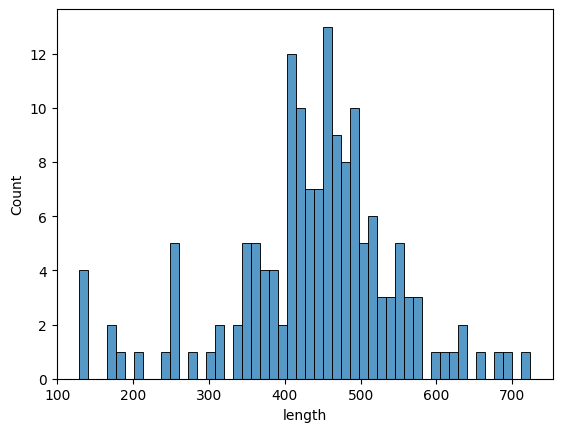

In [271]:
segment_stats = (
    sleep_status_merge_df.groupby(['Id','segment_uid'])
      .size()
      .reset_index(name='length')
)

sns.histplot(segment_stats['length'], bins=50)

In [272]:
sleep_status_merge_df['value'].value_counts().sort_index()


,count
value,
1,63012
2,3340
3,636


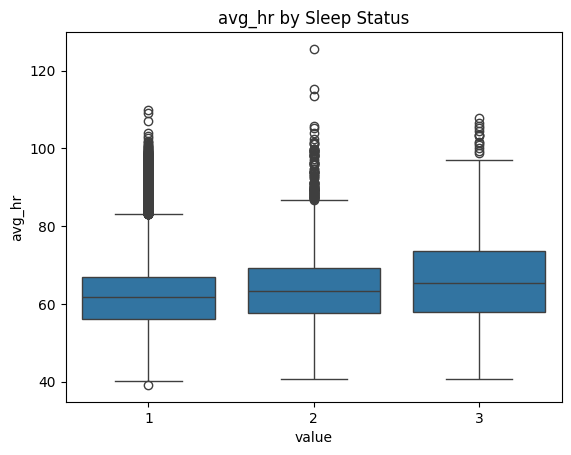

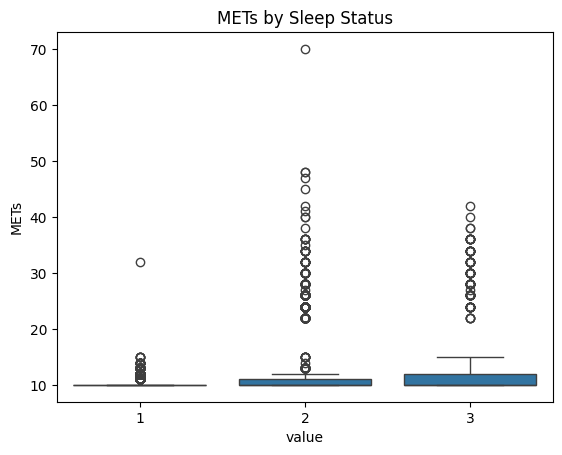

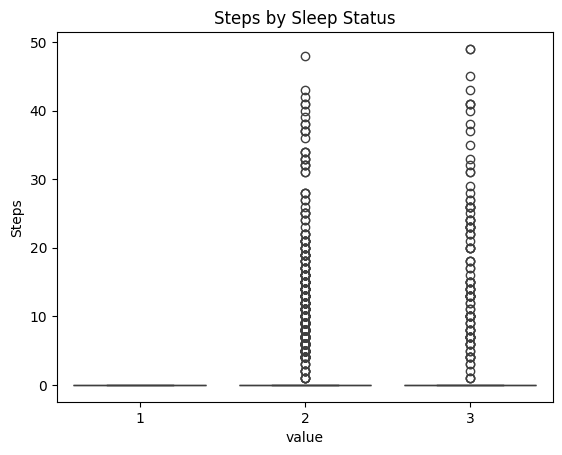

In [273]:
features = ['avg_hr', 'METs', 'Steps']

for f in features:
    sns.boxplot(
        x='value',
        y=f,
        data=sleep_status_merge_df
    )
    plt.title(f'{f} by Sleep Status')
    plt.show()

<Axes: xlabel='hour', ylabel='count'>

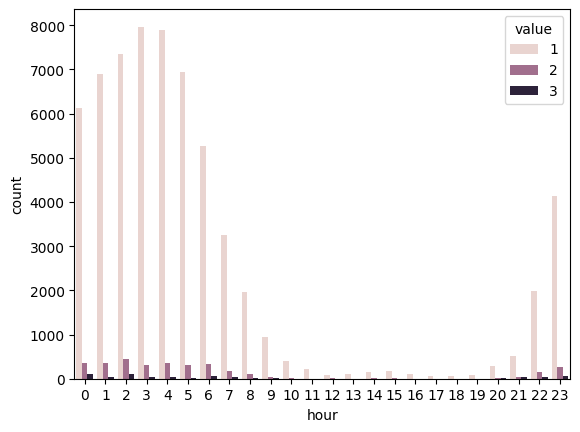

In [274]:
sleep_status_merge_df['hour'] = sleep_status_merge_df['ActivityMinute'].dt.hour

sns.countplot(
    x='hour',
    hue='value',
    data=sleep_status_merge_df
)

<Axes: xlabel='Id'>

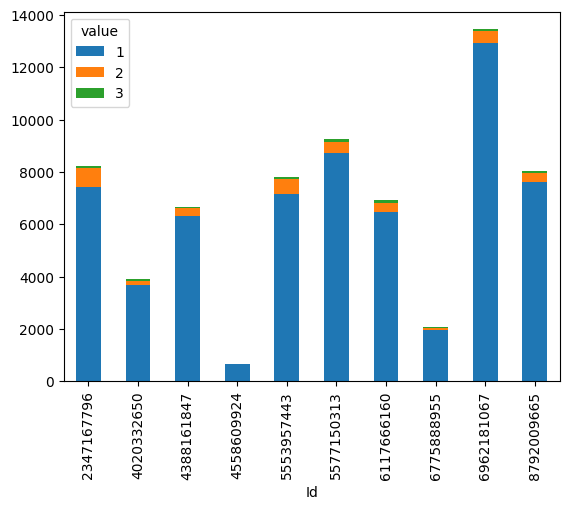

In [275]:
user_sleep_dist = (
    sleep_status_merge_df.groupby(['Id','value'])
           .size()
           .unstack(fill_value=0)
)

user_sleep_dist.plot(kind='bar', stacked=True)

#### Interpretation

In this dataset, sleep status is classified into three device-defined categories:
`1 = Asleep, 2 = Restless, and 3 = Awake`.

From the boxplots, the average heart rate during the `Asleep` state is consistently lower than in the other two states, which aligns with expected physiological patterns during sleep. In contrast, the `Awake` state exhibits significantly higher heart rates and greater variability, reflecting increased physical and mental activity. A similar trend is observed for METs, where activity intensity increases progressively from Asleep to `Awake`.

Notably, the `Restless` state shows a larger number of high-value outliers in both heart rate and `METs`. This suggests intermittent body movements, such as turning or repositioning during sleep, which are captured by wearable sensors as short bursts of activity. Correspondingly, step counts occasionally appear in both Restless and `Awake` states, likely caused by motion artifacts rather than sustained walking behavior.

Temporal distribution analysis indicates that most sleep records occur during nighttime hours, consistent with typical circadian sleep patterns. However, a non-negligible portion of sleep observations is also present during daytime, which may correspond to daytime naps or irregular sleep schedules.

Finally, user-level distributions reveal that most individuals exhibit a dominant `Asleep` state, with fewer observations in `Restless` and Awake states. This consistent pattern across users suggests stable sleep behavior and supports the generalizability of downstream sleep state modeling.





### 1.3.2 Features Correlation

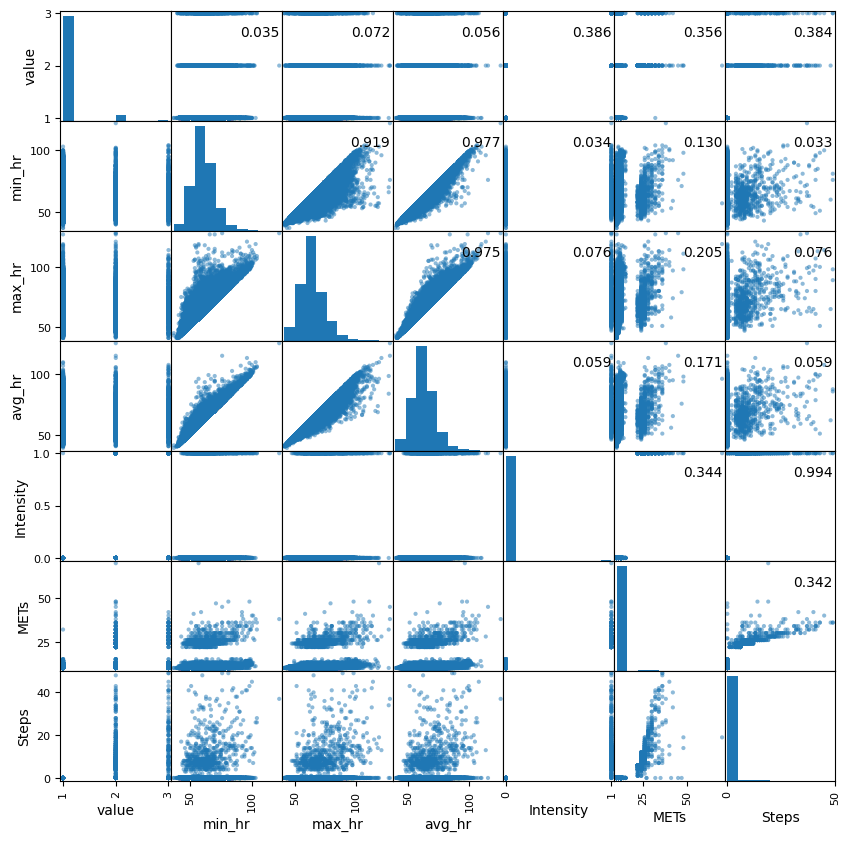

In [276]:
axes = pd.plotting.scatter_matrix(sleep_status_merge_df[['value','min_hr','max_hr','avg_hr','Intensity','METs','Steps']], alpha=0.5,figsize= [10,10])
corr = sleep_status_merge_df[['value','min_hr','max_hr','avg_hr','Intensity','METs','Steps']].corr(method = 'spearman').to_numpy()
#nonlinear
for i, j in zip(*plt.np.triu_indices_from(axes, k=1)):
  axes[i, j].annotate("%.3f" %corr[i,j], (0.8, 0.8), xycoords='axes fraction', ha='center', va='center')

plt.show()

## 1.4 Save cleaned datasets

In [277]:
calories_merged_df[['Id', 'ActivityMinute', 'Calories', 'Intensity', 'METs', 'Steps']]. \
      to_csv(google_drive_path + '/calories_merged_df.csv')
sleep_status_merge_df[['Id', 'ActivityMinute', 'min_hr', 'max_hr', 'avg_hr', 'Intensity', 'METs', 'Steps', 'value', 'segment_uid']]. \
      to_csv(google_drive_path + '/sleep_status_merge_df.csv')

In [278]:
# load cleaned dataset

# calories_merged_df = pd.read_csv(google_drive_path + '/calories_merged_df.csv')
# sleep_status_merge_df = pd.read_csv(google_drive_path + '/sleep_status_merge_df.csv')
# sleep_status_merge_df

# 2. Model traning

# Task
Build and evaluate an LSTM model for sleep status prediction using the "sleep_status_merge_df.csv" dataset.

## Prepare data for LSTM


In [279]:
sleep_status_merge_df = pd.read_csv(google_drive_path + '/sleep_status_merge_df.csv', index_col=0)
sleep_status_merge_df['ActivityMinute'] = pd.to_datetime(sleep_status_merge_df['ActivityMinute'])
print(sleep_status_merge_df.head())
print(sleep_status_merge_df.info())

           Id      ActivityMinute  min_hr  max_hr  avg_hr  Intensity  METs  \
0  2347167796 2016-03-29 00:00:00      68      69      69          0    10   
1  2347167796 2016-03-29 00:01:00      68      69      69          0    10   
2  2347167796 2016-03-29 00:02:00      68      70      69          0    10   
3  2347167796 2016-03-29 00:03:00      67      70      68          0    10   
4  2347167796 2016-03-29 00:04:00      69      70      69          0    10   

   Steps  value   segment_uid  
0      0      1  2347167796_1  
1      0      1  2347167796_1  
2      0      1  2347167796_1  
3      0      1  2347167796_1  
4      0      1  2347167796_1  
<class 'pandas.core.frame.DataFrame'>
Index: 66988 entries, 0 to 66987
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Id              66988 non-null  int64         
 1   ActivityMinute  66988 non-null  datetime64[ns]
 2   min_hr          66988 

In [280]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.utils import to_categorical

# Define features and target
features = ['min_hr', 'max_hr', 'avg_hr', 'Intensity', 'METs', 'Steps']
target = 'value'

X = sleep_status_merge_df[features]
y = sleep_status_merge_df[target]

# One-hot encode the target variable
# The 'value' column ranges from 1 to 3, so we need to adjust for 0-indexing
# and ensure the output shape matches the number of classes (3).
y_encoded = to_categorical(y - 1, num_classes=3)

print("Original target head:")
print(y.head())
print("\nOne-hot encoded target shape:")
print(y_encoded.shape)
print("One-hot encoded target head:")
print(y_encoded[:5])

Original target head:
0    1
1    1
2    1
3    1
4    1
Name: value, dtype: int64

One-hot encoded target shape:
(66988, 3)
One-hot encoded target head:
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


**Reasoning**:
I will initialize and fit a `MinMaxScaler` to the numerical features stored in `X` and then transform these features. This will scale the data to a range between 0 and 1, which is crucial for the performance of LSTM models.



In [281]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

print("Shape of scaled features:", X_scaled.shape)
print("First 5 rows of scaled features:\n", X_scaled[:5])

Shape of scaled features: (66988, 6)
First 5 rows of scaled features:
 [[0.36470588 0.32183908 0.34302251 0.         0.         0.        ]
 [0.36470588 0.32183908 0.34302251 0.         0.         0.        ]
 [0.36470588 0.33333333 0.34533762 0.         0.         0.        ]
 [0.35294118 0.33333333 0.33762058 0.         0.         0.        ]
 [0.37647059 0.33333333 0.34765273 0.         0.         0.        ]]


**Reasoning**:
The next step is to prepare the data for LSTM by creating sequences from the scaled features and one-hot encoded target. I will group the data by 'segment_uid' and then create overlapping sequences of a fixed 'time_steps' for both features and the target. This ensures that the data is in the correct 3D format (samples, timesteps, features) required by LSTM models.



In [282]:
time_steps = 60 # Define the length of each sequence (e.g., 60 minutes)

X_sequences = []
y_sequences = []

# Group by 'segment_uid' and create sequences
for segment_uid, segment_df in sleep_status_merge_df.groupby('segment_uid'):
    segment_X = X_scaled[segment_df.index]
    segment_y = y_encoded[segment_df.index]

    for i in range(len(segment_X) - time_steps + 1):
        X_sequences.append(segment_X[i:i + time_steps])
        y_sequences.append(segment_y[i + time_steps - 1]) # Predict the target at the end of the sequence

X_sequences = np.array(X_sequences)
y_sequences = np.array(y_sequences)

print("Shape of X_sequences:", X_sequences.shape)
print("Shape of y_sequences:", y_sequences.shape)

Shape of X_sequences: (57961, 60, 6)
Shape of y_sequences: (57961, 3)


## Split data into training and testing sets

### Subtask:
Divide the preprocessed data into training and testing sets, ensuring proper temporal splitting if applicable to time series data.


**Reasoning**:
I will import `train_test_split` from `sklearn.model_selection` and use it to split `X_sequences` and `y_sequences` into training and testing sets with a test size of 0.2 and a random state for reproducibility. Finally, I will print the shapes of the resulting arrays to verify the split.



In [283]:
from sklearn.model_selection import train_test_split

split_idx = int(0.8 * len(X_sequences))

X_train = X_sequences[:split_idx]
X_test  = X_sequences[split_idx:]

y_train = y_sequences[:split_idx]
y_test  = y_sequences[split_idx:]

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (46368, 60, 6)
Shape of X_test: (11593, 60, 6)
Shape of y_train: (46368, 3)
Shape of y_test: (11593, 3)


## Build LSTM model

### Subtask:
Define and compile the LSTM neural network architecture using Keras or TensorFlow.


**Reasoning**:
I will define the LSTM model architecture by importing necessary Keras layers, creating a Sequential model with an LSTM layer, a Dropout layer, and a Dense output layer with softmax activation. Finally, I will compile the model using the Adam optimizer and categorical cross-entropy loss.



In [284]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

n_features = X_train.shape[2] # Number of features

model = Sequential()
model.add(LSTM(units=64, return_sequences=True, input_shape=(time_steps, n_features)))
model.add(Dropout(0.3))
model.add(LSTM(units=64, return_sequences=False))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu')),
model.add(Dense(units=3, activation='softmax')) # 3 classes for sleep status

model.compile(optimizer=Adam(learning_rate=1e-3), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_28 (LSTM)                  │ (None, 60, 64)         │        18,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_26 (Dropout)            │ (None, 60, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_29 (LSTM)                  │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_27 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 53,379 (208.51 KB)

 Trainable params: 53,379 (208.51 KB)

 Non-trainable params: 0 (0.00 B)

**Reasoning**:
The previous code block successfully defined and compiled the LSTM model. The next logical step, according to the overall task of building and evaluating an LSTM model, is to train this model using the prepared training data. I will add a markdown cell to introduce this subtask and then a code cell to execute the training process.



**Reasoning**:
The previous attempt resulted in a SyntaxError because markdown content was placed within a Python code block. The next logical step is to train the previously defined LSTM model. I will now provide the Python code to train the model using `model.fit()` with specified epochs and batch size, and include validation data.



In [285]:
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.utils.class_weight import compute_class_weight

# Define EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_loss', # Metric to monitor
    patience=10,        # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True # Restore model weights from the epoch with the best value of the monitored metric
)


y_train_int = np.argmax(y_train, axis=1)

classes = np.array([0, 1, 2])

w = compute_class_weight(
    class_weight='balanced',
    classes=classes,
    y=y_train_int
)

class_weight_dict = dict(zip(classes, w))

print("Class weights:", class_weight_dict)

history = model.fit(
    X_train,
    y_train,
    epochs=100,  # You can adjust the number of epochs
    batch_size=64, # You can adjust the batch size
    validation_data=(X_test, y_test),
    callbacks=[early_stopping],
    # class_weight=class_weight_dict
)

print("Model training complete.")

Class weights: {np.int64(0): np.float64(0.35385425490510314), np.int64(1): np.float64(6.579821200510856), np.int64(2): np.float64(45.45882352941177)}
Epoch 1/100
725/725 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9407 - loss: 0.2809 - val_accuracy: 0.9688 - val_loss: 0.1283
Epoch 2/100
725/725 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.9475 - loss: 0.1929 - val_accuracy: 0.9711 - val_loss: 0.1258
Epoch 3/100
725/725 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.9519 - loss: 0.1809 - val_accuracy: 0.9714 - val_loss: 0.1131
Epoch 4/100
725/725 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.9504 - loss: 0.1766 - val_accuracy: 0.9709 - val_loss: 0.1130
Epoch 5/100
725/725 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.9521 - loss: 0.1624 - val_accuracy: 0.9716 - val_loss: 0.1039
Epoch 6/100
725/725 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.9520 - loss: 0.1556 - val_accuracy: 0.9712 - val_loss: 0.1035
Epoch 7/100
725/725 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.9

## Evaluate LSTM model

### Subtask:
Evaluate the trained LSTM model's performance on the test data using appropriate metrics like accuracy, precision, recall, and F1-score.

In [286]:
from sklearn.metrics import classification_report

loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=['Asleep', 'Restless', 'Awake']))

363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9797 - loss: 0.0604
Test Loss: 0.0701
Test Accuracy: 0.9770
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

Classification Report:
              precision    recall  f1-score   support

      Asleep       0.98      1.00      0.99     11167
    Restless       0.79      0.44      0.56       380
       Awake       0.61      0.74      0.67        46

    accuracy                           0.98     11593
   macro avg       0.79      0.72      0.74     11593
weighted avg       0.97      0.98      0.97     11593

